In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.linear_model import SGDClassifier

# Multiprocesado
import multiprocessing

# Red Neuronal
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Guardar Modelo
import pickle

# 4 GESTOS PUÑO

In [112]:
path = "data_train.csv"

df = pd.read_csv(path)

In [113]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [114]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876,43:54.481843,0
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185,43:54.730036,0
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477,43:54.984387,0
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060,43:55.230151,0
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270,43:55.485744,0


In [115]:
print(df.shape)

(611, 16)


Obtenemos el número de gestos realizados, `label`

In [116]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 4



0. Reposo
1. Puño
2. Pronación
3. Supinación


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [117]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [118]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [119]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,14228.018934,2516.672068,8759.775918,17912.609167,13565.332446,6672.190490,11427.609214,3816.264389,114.974822,161.032554,155.686549,0.004293,0.008734,0.003876
1,14241.933025,2529.667441,8750.088925,17902.735433,13551.887216,6697.306678,11439.382437,3825.546816,114.318032,161.363879,156.577977,0.003550,0.005705,0.003185
2,14242.383322,2531.197838,8750.011409,17901.926023,13552.131947,6692.886886,11438.034640,3825.203373,114.842731,161.108854,156.065241,0.003893,0.004714,0.002477
3,14287.078773,2584.528776,8698.042694,17847.146320,13501.400470,6738.309668,11485.514839,3875.574744,114.701851,161.055139,156.587499,0.003663,0.006887,0.002060
4,14336.418593,2630.144929,8656.078997,17804.410780,13458.709888,6785.315712,11518.672085,3914.279202,114.563534,161.126800,156.120909,0.003515,0.002250,0.002270


In [120]:
y_df.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [121]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,11622.179813,10915.520759,8056.418601,14681.380317,13294.666045,10308.071593,11895.391264,4749.499368,60.320075,159.498655,165.934021,0.057625,0.016791,0.014657
std,9766.747136,4332.694003,6971.343890,5117.598420,8185.233155,2465.838307,4551.750454,2759.076424,28.758843,53.696153,43.598712,0.131541,0.025816,0.017989
min,29.660622,2516.672068,139.751427,8029.783439,3023.975367,5501.020475,5911.057499,480.783204,2.468458,8.325124,2.190726,0.002094,0.001216,0.001064
25%,3570.540309,8502.575203,843.890546,9203.664944,4466.823053,8439.643824,7166.184554,1808.641035,43.460480,156.265574,142.519244,0.007044,0.004549,0.004751
50%,14323.057635,10041.657170,9206.761671,15836.832447,17138.591376,10542.189754,12339.873275,5318.322255,53.398402,176.767079,164.521356,0.013015,0.007275,0.008010
75%,17046.247736,12314.282846,12497.641539,18162.277806,21332.852723,12487.877642,17387.246494,6708.091157,70.918347,187.898638,186.952580,0.027047,0.016677,0.015948
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,11767.637920,128.159950,243.803526,252.074446,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [122]:
y_df.value_counts()

label
2    153
1    153
3    153
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [123]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [124]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [125]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [126]:
y_df.isnull().any()

False

In [127]:
y_df.isnull().sum()

0

In [128]:
y_df.isnull().sum() / len(y_df) * 100

0.0

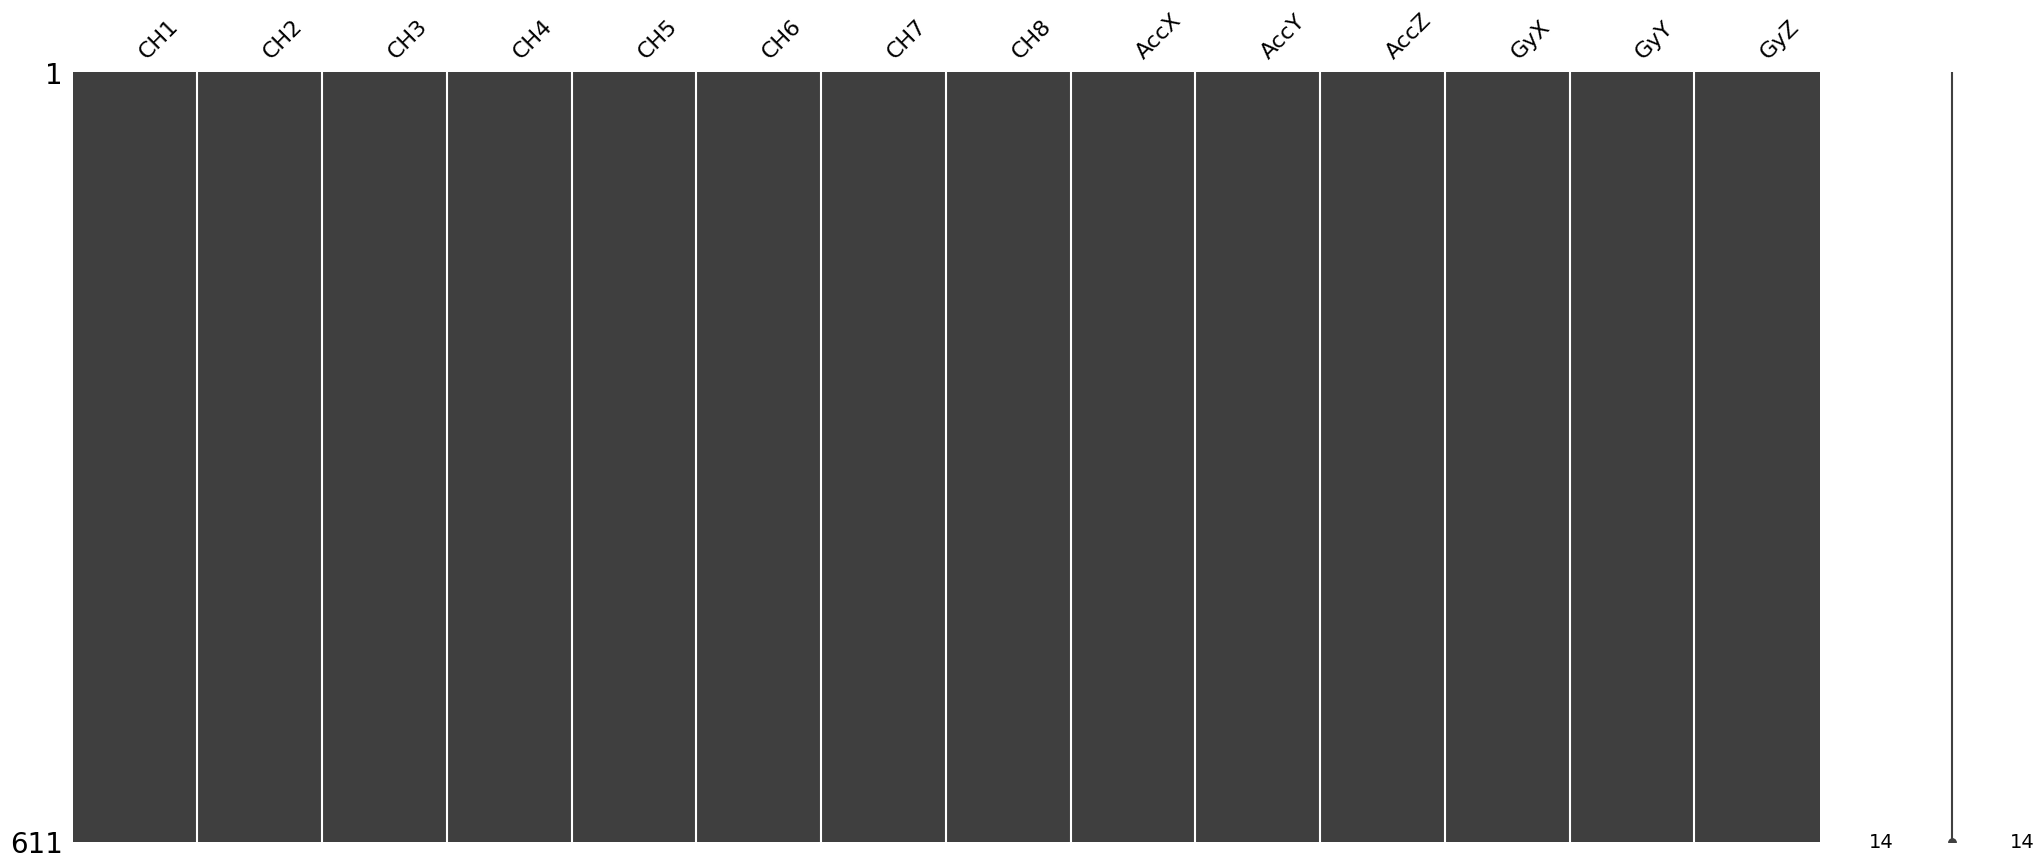

In [129]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

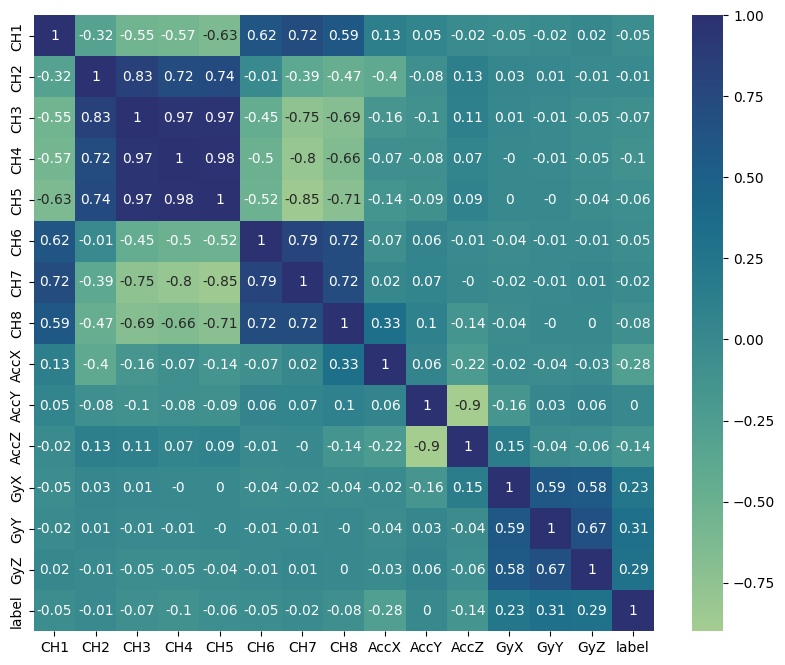

In [130]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [133]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [134]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [136]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [137]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [138]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [5, 10, 25, 50, 75, 100,
                                                      125, 150, 175, 200, 225,
                                                      250, 275, 300, 325, 350,
                                                      375, 400, 425, 450, 475,
                                                      500, 550]})

In [139]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
9,True,200,0.934384,0.015540
10,True,225,0.932339,0.013499
7,True,150,0.930294,0.012836
8,True,175,0.930294,0.012836
11,True,250,0.928249,0.010670


In [140]:
random_forest_grid.best_score_

0.9343835996869397

In [141]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 200}

In [142]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=33))])


In [143]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [144]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.96      1.00      0.98        27
           2       1.00      0.88      0.94        34
           3       0.90      0.96      0.93        28

    accuracy                           0.96       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.96      0.96      0.96       123



In [145]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.959349593495935


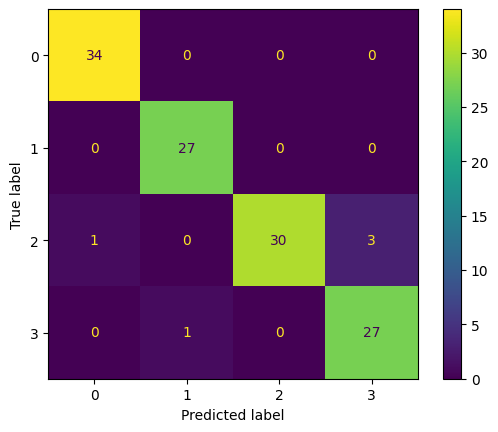

In [146]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [147]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [148]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [149]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
28,50,l2,newton-cg,0.798102,0.027300,0.832492,0.011726
20,25,l2,newton-cg,0.796065,0.024933,0.833547,0.010235
0,1,None,newton-cg,0.795767,0.041331,0.832442,0.011689
16,25,None,newton-cg,0.795767,0.041331,0.832442,0.011689
72,200,None,newton-cg,0.795767,0.041331,0.832442,0.011689


In [150]:
logistic_grid.best_params_

{'classifier__C': 50,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [151]:
logistic_grid.best_score_

0.7981020503886357

In [152]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=50, class_weight='balanced',
                                    random_state=33, solver='newton-cg'))])


In [153]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [-0.55986985  2.06495675 -1.93831498  0.43322809]
Coeficientes: [('CH1', -3.7509811095665877), ('CH2', -0.5895178165315291), ('CH3', -0.4320790422551637), ('CH4', 1.191527841544898), ('CH5', 1.0862404584305962), ('CH6', 2.0121778468333593), ('CH7', 3.296202867440268), ('CH8', -0.534110779334227), ('AccX', 1.6225234228900187), ('AccY', 1.5884975405519246), ('AccZ', 1.848300978132462), ('GyX', -2.813962289770964), ('GyY', -0.8476543116574525), ('GyZ', 1.12359717839859), ('TimeStamp', 2.3613969191735364), ('label', 1.2660833903841582)]
Accuracy de test: 0.8130081300813008


In [154]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [155]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.68      0.63      0.65        27
           2       0.94      0.91      0.93        34
           3       0.86      0.86      0.86        28

    accuracy                           0.81       123
   macro avg       0.81      0.81      0.81       123
weighted avg       0.81      0.81      0.81       123



In [156]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.8130081300813008


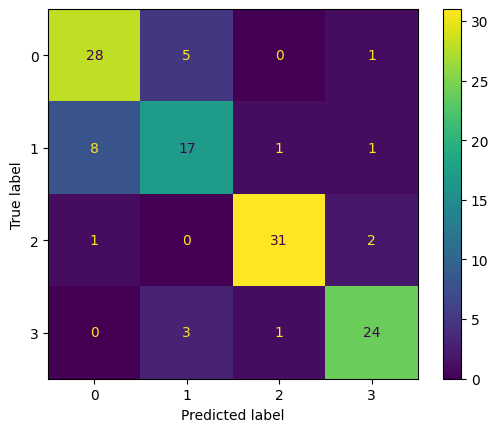

In [157]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [158]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [159]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                       0.5, 0.7, 0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [160]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
797,1,0.9,3,100,0.953009,0.012631,1.0,0.0
796,1,0.9,3,75,0.953009,0.012631,1.0,0.0
795,1,0.9,3,50,0.953009,0.012631,1.0,0.0
794,1,0.9,3,25,0.953009,0.012631,1.0,0.0
793,1,0.9,3,10,0.953009,0.012631,1.0,0.0


In [161]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': 7,
 'classifier__max_leaf_nodes': 10}

In [162]:
hist_gradient_grid.best_score_

0.9530091351737693

In [163]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.5, max_depth=7,
                                                max_iter=1000,
                                                max_leaf_nodes=10,
                                                n_iter_no_change=5,
              

In [164]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [165]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        27
           2       0.97      0.94      0.96        34
           3       0.97      1.00      0.98        28

    accuracy                           0.98       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



In [166]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.975609756097561


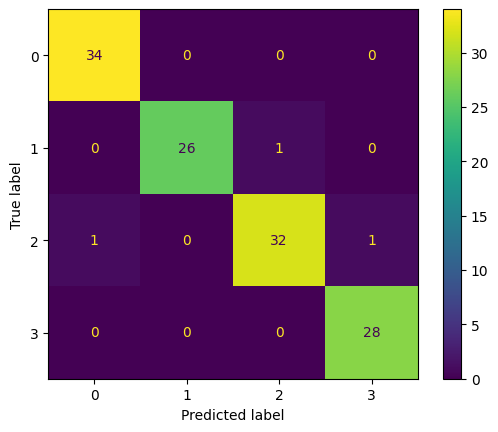

In [167]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [168]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [169]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [170]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
728,0.3,7,401,0.5,0.947008,0.006245
734,0.3,7,226,0.5,0.947008,0.006245
746,0.3,7,156,0.5,0.945024,0.009049
1268,0.5,75,401,0.5,0.942893,0.003041
1178,0.5,15,401,0.5,0.942893,0.003041


In [171]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 401,
 'classifier__subsample': 0.5}

In [172]:
XGBoost_grid.best_score_

0.947008360880312

In [173]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
             

In [174]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [175]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.84      1.00      0.92        27
           2       1.00      0.91      0.95        34
           3       0.93      0.93      0.93        28

    accuracy                           0.93       123
   macro avg       0.94      0.94      0.93       123
weighted avg       0.94      0.93      0.94       123



In [176]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.9349593495934959


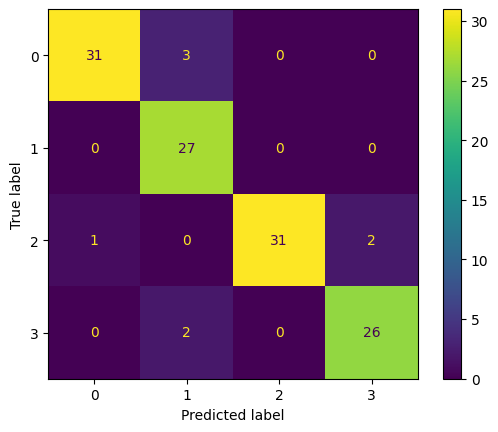

In [177]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [178]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [179]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 14
[LightGBM] [Info] Start training from score -1.419631
[LightGBM] [Info] Start training from score -1.354033
[LightGBM] [Info] Start training from score -1.411192
[LightGBM] [Info] Start training from score -1.362002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014855C0E8D0>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [180]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
250,gbdt,True,0.9,3,307,7,1,0.956977,0.004667,1.0,0.0
497,gbdt,True,0.5,10,293,100,0.9,0.955146,0.007115,1.0,0.0
123,gbdt,True,0.5,10,442,25,0.7,0.953162,0.007288,1.0,0.0
42,gbdt,True,0.5,10,457,100,0.9,0.953162,0.007288,1.0,0.0
244,gbdt,True,0.5,10,117,100,0.1,0.953162,0.007288,1.0,0.0


In [181]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.9,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 307,
 'classifier__num_leaves': 7,
 'classifier__subsample': 1}

In [182]:
light_grid.best_score_

0.9569773891420232

In [183]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.9,
                                max_depth=3, n_estimators=307, num_leaves=7,
                                random_state=33, subsample=1))])


In [184]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [185]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      1.00      1.00        27
           2       0.94      0.94      0.94        34
           3       0.96      0.93      0.95        28

    accuracy                           0.97       123
   macro avg       0.97      0.97      0.97       123
weighted avg       0.97      0.97      0.97       123



In [186]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.967479674796748


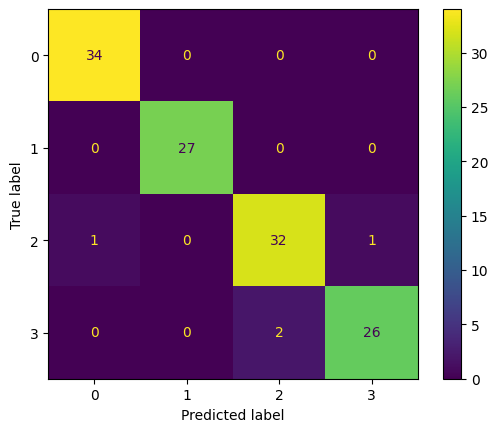

In [187]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [188]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [189]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [190]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
137,175,0.1,rbf,0.876124,0.025445
121,150,0.1,rbf,0.874140,0.025933
89,100,0.1,rbf,0.873987,0.029541
105,125,0.1,rbf,0.872003,0.026779
153,200,0.1,rbf,0.872003,0.023305


In [191]:
svm_grid.best_params_

{'classifier__C': 175, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

In [192]:
svm_grid.best_score_

0.8761238422823788

In [193]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=175, gamma=0.1))])


In [194]:
modelo_final_svm = svm_grid.best_estimator_

In [195]:
y_test_pred = modelo_final_svm.predict(x_test)

In [196]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.92      0.89      0.91        27
           2       0.97      0.94      0.96        34
           3       0.93      0.93      0.93        28

    accuracy                           0.93       123
   macro avg       0.93      0.93      0.93       123
weighted avg       0.94      0.93      0.93       123



In [197]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.9349593495934959


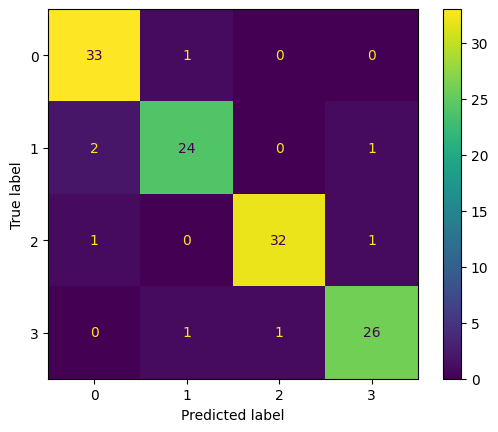

In [198]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [199]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [200]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [201]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
157,0.1,0.01,adaptive,perceptron,l2,0.795357,0.023745
556,0.001,0.001,adaptive,perceptron,l1,0.794851,0.027811
159,0.1,0.01,adaptive,perceptron,None,0.794851,0.022182
493,0.001,0.001,constant,squared_hinge,l2,0.793149,0.025380
1032,0.00001,0.001,adaptive,squared_hinge,l1,0.793149,0.020885


In [202]:
sgd_grid.best_params_

{'classifier__alpha': 0.1,
 'classifier__eta0': 0.01,
 'classifier__learning_rate': 'adaptive',
 'classifier__loss': 'perceptron',
 'classifier__penalty': 'l2'}

In [203]:
sgd_grid.best_score_

0.7953574034366717

In [204]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.1, eta0=0.01, learning_rate='adaptive',
                               loss='perceptron'))])


In [205]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [206]:
print(classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        34
           1       0.54      0.70      0.61        27
           2       0.94      0.94      0.94        34
           3       0.96      0.93      0.95        28

    accuracy                           0.78       123
   macro avg       0.79      0.78      0.78       123
weighted avg       0.79      0.78      0.78       123



In [207]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.7804878048780488


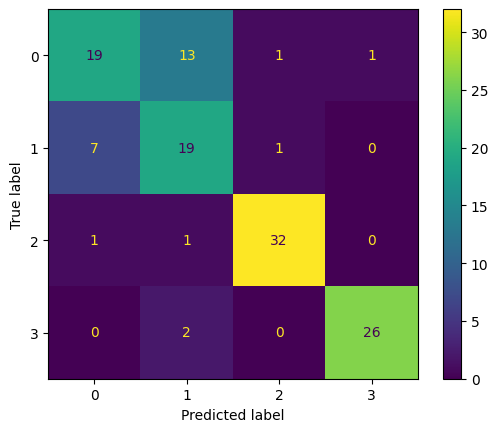

In [208]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

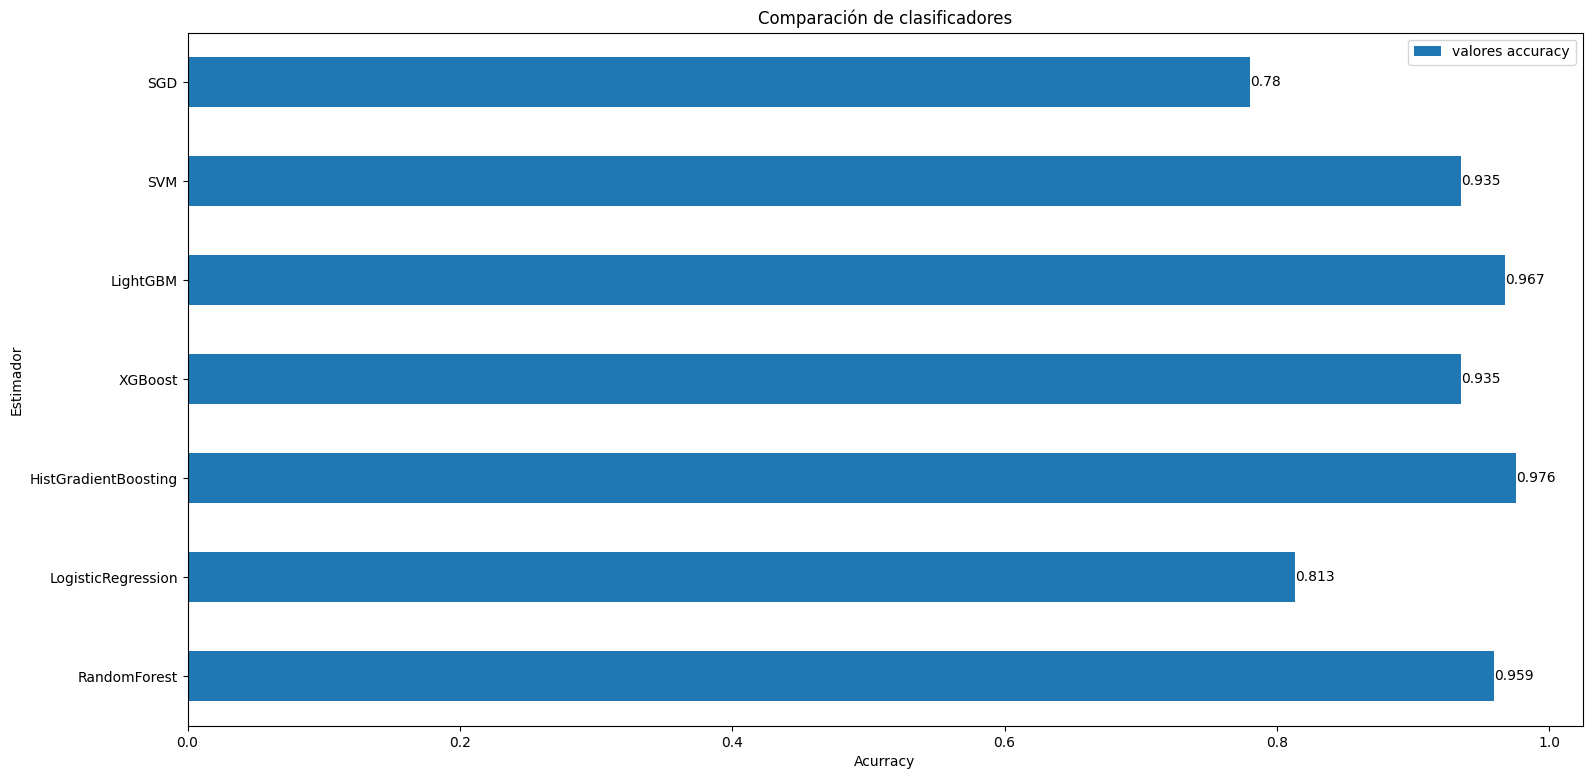

In [209]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`. 

In [210]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [211]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.1,
        eta0 = 0.01,
        learning_rate = 'adaptive',
        loss = 'perceptron',
        penalty = 'l1'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_sgd.pkl', 'wb'))

In [217]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 200
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_RF.pkl', 'wb'))

In [212]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 175,
        gamma = 0.1,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_SVM.pkl', 'wb'))

In [216]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 50,
        penalty = 'l2',
        solver = 'newton-cg',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_LR.pkl', 'wb'))

In [215]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.5,
        max_depth = 7,
        max_leaf_nodes = 10         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_HIST.pkl', 'wb'))

In [214]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.3,
        max_depth = 7,
        n_estimators = 401,
        subsample = 0.5        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_XGB.pkl', 'wb'))

In [213]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.9,
        max_depth = 3,
        n_estimators = 307,
        num_leaves = 7,
        subsample = 1      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 14
[LightGBM] [Info] Start training from score -1.419631
[LightGBM] [Info] Start training from score -1.354033
[LightGBM] [Info] Start training from score -1.411192
[LightGBM] [Info] Start training from score -1.362002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 